# Asset Inflation Performance
The goal of this project is to find out which asset class is safer against inflation. This will be achieved by comparing the Treasury Bonds and Equity market (SP500) datasets against historical CPI (Customer Price Index).

## 1. Gather Data
In this step we'll import necessary packages and load our datasets.

**Data Sources**
- Inflation: [NASDAQ CPI](https://data.nasdaq.com/data/RATEINF/CPI_USA-consumer-price-index-usa)
- T-Bond: [Damodaran Online: Historical Returns on Stocks, Bonds and Bills](https://pages.stern.nyu.edu/~adamodar/New_Home_Page/datafile/histretSP.html)
- S&P 500: [ONLINE DATA ROBERT SHILLER](http://www.econ.yale.edu/~shiller/data.htm)

In [28]:
import os
import requests
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import nasdaqdatalink

warnings.simplefilter(action='ignore', category=FutureWarning)


### Dataset 1: Inflation Data

**Type:** Data.NASDAQ API

**Method:** Gather via API from data.nasdaq.com ([API Instructions](https://docs.data.nasdaq.com/docs/python-time-series))

**Dataset variables:**

- Date: Date
- Value: Consumer Price Index for All Urban Consumers (All Items)

In [29]:
inflation = nasdaqdatalink.get("FRED/CPIAUCSL")

### Dataset 2: T. Bonds

**Type:** Excel file

**Method:** Download from Damodaran Online: Historical Returns on Stocks, Bonds and Bills

**Dataset variables:**

- Year: Year of the bond return
- US T. Bond: Bond Return
- 3-month T.Bill: 3-month T.Bill return

In [30]:
tbonds = pd.read_excel("data/raw_histretSP.xls", sheet_name="Returns by year", header=17)

### Dataset 3: S&P 500

**Type:** Excel file

**Method:** Download from Online Data Robert Shiller

**Dataset variables:**

- Date: Date
- P: Price
- D: Dividend

In [31]:
sp500 = pd.read_excel("data/raw_ie_data.xls", sheet_name="Data", header=7)

## 2. Assess data
In this step we'll assess the data for quality and tidiness issues and report on findings for use in the cleaning stage.

**Quality Issues**

### Quality issue 1:
We need the date standardized by last day annually across all datasets, but `inflation` is by first day of the month, and `sp500` is by month. These data types also need to be converted to datetime in all three datasets.

In [32]:
# Inspect dataframes visually
display(inflation.head())
display(tbonds.head())
display(sp500.head())

,Value
Date,
1947-01-01,21.48
1947-02-01,21.62
1947-03-01,22.00
1947-04-01,22.00
1947-05-01,21.95


,Year,S&P 500 (includes dividends),3-month T.Bill,US T. Bond,Baa Corporate Bond,Real Estate,Gold*,S&P 500 (includes dividends)3,3-month T.Bill4,US T. Bond5,...,Stocks - Bonds,Stocks - Baa Corp Bond,Historical risk premium,Inflation Rate,S&P 500 (includes dividends)2,3-month T. Bill (Real),!0-year T.Bonds,Baa Corp Bonds,Real Estate3,Gold
0,1928,0.438112,0.0308,0.008355,0.032196,0.014911,0.000969,143.811155,103.080000,100.835471,...,0.429757,0.405916,NaN,-0.011561,0.454932,0.042856,0.020148,0.044268,0.026781,0.012676
1,1929,-0.082979,0.0316,0.042038,0.030179,-0.020568,-0.001452,131.877782,106.337328,105.074397,...,-0.125018,-0.113158,NaN,0.005848,-0.088311,0.025602,0.03598,0.024189,-0.026262,-0.007258
2,1930,-0.251236,0.0455,0.045409,0.005398,-0.043000,0.000969,98.745288,111.175676,109.845753,...,-0.296646,-0.256634,NaN,-0.063953,-0.200079,0.116932,0.116835,0.07409,0.022385,0.069359
3,1931,-0.438375,0.0231,-0.025589,-0.156808,-0.081505,-0.173850,55.457774,113.743835,107.034958,...,-0.412787,-0.281568,NaN,-0.093168,-0.380674,0.128213,0.074522,-0.070178,0.012861,-0.088971
4,1932,-0.086424,0.0107,0.087903,0.235896,-0.104664,0.212778,50.664911,114.960894,116.44366,...,-0.174327,-0.322320,NaN,-0.10274,0.018184,0.126429,0.212472,0.377411,-0.002145,0.351646


,Date,P,D,E,CPI,Fraction,Rate GS10,Price,Dividend,Price.1,...,CAPE,Unnamed: 13,TR CAPE,Unnamed: 15,Yield,Returns,Returns.1,Real Return,Real Return.1,Returns.2
0,1871.01,4.44,0.26,0.4,12.464061,1871.041667,5.32,109.050018,6.385812,109.050018,...,NaN,NaN,NaN,NaN,NaN,1.004177,1.000000,0.130609,0.092504,0.038106
1,1871.02,4.5,0.26,0.4,12.844641,1871.125000,5.323333,107.248908,6.196604,107.765291,...,NaN,NaN,NaN,NaN,NaN,1.004180,0.974424,0.130858,0.094635,0.036224
2,1871.03,4.61,0.26,0.4,13.034972,1871.208333,5.326667,108.266269,6.106124,109.298845,...,NaN,NaN,NaN,NaN,NaN,1.004183,0.964209,0.130951,0.096186,0.034765
3,1871.04,4.74,0.26,0.4,12.559226,1871.291667,5.33,115.536124,6.337425,117.171191,...,NaN,NaN,NaN,NaN,NaN,1.004185,1.004919,0.122056,0.090972,0.031084
4,1871.05,4.86,0.26,0.4,12.273812,1871.375000,5.333333,121.215781,6.484795,123.479273,...,NaN,NaN,NaN,NaN,NaN,1.004188,1.032591,0.122638,0.089488,0.033150


In [33]:
# Inspect dataframes programatically
display(inflation.info())
display(tbonds.info())
display(sp500.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 901 entries, 1947-01-01 to 2022-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   901 non-null    float64
dtypes: float64(1)
memory usage: 14.1 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           105 non-null    object 
 1   S&P 500 (includes dividends)   101 non-null    float64
 2   3-month T.Bill                 101 non-null    float64
 3   US T. Bond                     101 non-null    float64
 4    Baa Corporate Bond            101 non-null    float64
 5   Real Estate                    101 non-null    float64
 6   Gold*                          101 non-null    float64
 7   S&P 500 (includes dividends)3  95 non-null     float64
 8   3-month T.Bill4                95 non-null     float64
 9   US T. Bond5                    104 non-null    object 
 10   Baa Corporate Bond2           104 non-null    object 
 11  Real Estate2                   100 non-null    object 
 12  Gold2                          99 non-null     obj

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1834 entries, 0 to 1833
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1833 non-null   float64
 1   P              1834 non-null   object 
 2   D              1830 non-null   float64
 3   E              1830 non-null   float64
 4   CPI            1834 non-null   object 
 5   Fraction       1833 non-null   float64
 6   Rate GS10      1834 non-null   object 
 7   Price          1833 non-null   float64
 8   Dividend       1830 non-null   float64
 9   Price.1        1833 non-null   float64
 10  Earnings       1830 non-null   float64
 11  Earnings.1     1830 non-null   float64
 12  CAPE           1713 non-null   float64
 13  Unnamed: 13    0 non-null      float64
 14  TR CAPE        1713 non-null   float64
 15  Unnamed: 15    2 non-null      float64
 16  Yield          1713 non-null   float64
 17  Returns        1832 non-null   float64
 18  Returns.

None

### Quality Issue 2:

In `tbonds`, all of the rows past 94 are invalid. In `sp500` the last row is invalid. These invalid rows should be removed.

In [34]:
# Inspect dataframes visually
display(tbonds.tail(15))
display(sp500.tail())

,Year,S&P 500 (includes dividends),3-month T.Bill,US T. Bond,Baa Corporate Bond,Real Estate,Gold*,S&P 500 (includes dividends)3,3-month T.Bill4,US T. Bond5,...,Stocks - Bonds,Stocks - Baa Corp Bond,Historical risk premium,Inflation Rate,S&P 500 (includes dividends)2,3-month T. Bill (Real),!0-year T.Bonds,Baa Corp Bonds,Real Estate3,Gold
93,2021,0.284689,0.000450,-0.044160,0.009334,0.189143,-0.037544,761710.833617,2098.027709,8526.950827,...,0.328849,0.275354,0.051322,0.071,0.199522,-0.065873,-0.107526,-0.057578,0.110311,-0.101349
94,2022,-0.180090,0.020248,-0.178282,-0.144883,0.073033,0.005494,624534.546333,2140.508136,7006.751407,...,-0.001808,-0.035207,0.050613,0.0642,-0.229552,-0.041301,-0.227854,-0.19647,0.0083,-0.055164
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,Arithmetic Average Historical Return,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Risk Premium,...,NaN,NaN,NaN,Arithmetic Average Annual Real Return,NaN,NaN,NaN,NaN,NaN,NaN
97,1928-2022,0.115065,0.033202,0.048690,0.069579,0.044157,0.064836,NaN,NaN,Stocks - T.Bills,...,NaN,NaN,NaN,NaN,S&P 500 (includes dividends)2,3-month T. Bill (Real),!0-year T.Bonds,Baa Corp Bonds,Real Estate3,Gold
98,1973-2022,0.117317,0.043983,0.065890,0.087712,0.055352,0.095566,NaN,NaN,0.081863,...,NaN,NaN,NaN,1928-2022,0.082703,0.003059,0.018803,0.039114,0.012833,0.032111
99,2013-2022,0.135895,0.007815,0.005125,0.038144,0.076750,0.020283,NaN,NaN,0.073334,...,NaN,NaN,NaN,1973-2022,0.075648,0.003983,0.026345,0.047371,0.014958,0.050968
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.128079,...,NaN,NaN,NaN,2013-2022,0.107794,-0.017591,-0.019068,0.01289,0.049116,-0.005333
101,Geometric Average Historical Return,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,1928-2022,0.096360,0.032774,0.045747,0.066760,0.042302,0.048342,NaN,NaN,Stocks - T.Bills,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Date,P,D,E,CPI,Fraction,Rate GS10,Price,Dividend,Price.1,...,CAPE,Unnamed: 13,TR CAPE,Unnamed: 15,Yield,Returns,Returns.1,Real Return,Real Return.1,Returns.2
1829,2023.06,4345.372857,68.71,181.17,305.109,2023.458333,3.75,4359.878369,68.939364,2.859156e+06,...,29.939593,NaN,32.406031,NaN,0.023008,0.990805,40.341180,NaN,NaN,NaN
1830,2023.07,4508.0755,NaN,NaN,305.691,2023.541667,3.9,4514.512637,NaN,2.960563e+06,...,30.890926,NaN,33.384492,NaN,0.020635,0.981351,39.894155,NaN,NaN,NaN
1831,2023.08,4457.358696,NaN,NaN,305.982,2023.625000,4.17,4459.478251,NaN,2.924472e+06,...,30.469743,NaN,32.906500,NaN,0.018357,1.009988,39.112954,NaN,NaN,NaN
1832,2023.09,4515.77,NaN,NaN,306.1275,2023.708333,4.09,4515.770000,NaN,2.961388e+06,...,30.810961,NaN,33.251746,NaN,0.018723,NaN,39.484824,NaN,NaN,NaN
1833,NaN,Sept price is Sept 1st close,NaN,NaN,Aug/Sept CPI estimated,NaN,Sept GS10 is Sept 1st value,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# Inspect dataframes programatically
display(tbonds.info())
display(sp500.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           105 non-null    object 
 1   S&P 500 (includes dividends)   101 non-null    float64
 2   3-month T.Bill                 101 non-null    float64
 3   US T. Bond                     101 non-null    float64
 4    Baa Corporate Bond            101 non-null    float64
 5   Real Estate                    101 non-null    float64
 6   Gold*                          101 non-null    float64
 7   S&P 500 (includes dividends)3  95 non-null     float64
 8   3-month T.Bill4                95 non-null     float64
 9   US T. Bond5                    104 non-null    object 
 10   Baa Corporate Bond2           104 non-null    object 
 11  Real Estate2                   100 non-null    object 
 12  Gold2                          99 non-null     obj

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1834 entries, 0 to 1833
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1833 non-null   float64
 1   P              1834 non-null   object 
 2   D              1830 non-null   float64
 3   E              1830 non-null   float64
 4   CPI            1834 non-null   object 
 5   Fraction       1833 non-null   float64
 6   Rate GS10      1834 non-null   object 
 7   Price          1833 non-null   float64
 8   Dividend       1830 non-null   float64
 9   Price.1        1833 non-null   float64
 10  Earnings       1830 non-null   float64
 11  Earnings.1     1830 non-null   float64
 12  CAPE           1713 non-null   float64
 13  Unnamed: 13    0 non-null      float64
 14  TR CAPE        1713 non-null   float64
 15  Unnamed: 15    2 non-null      float64
 16  Yield          1713 non-null   float64
 17  Returns        1832 non-null   float64
 18  Returns.

None

**Tidiness Issues**

### Tidiness issue 1:
We don't need many of these columns and can remove them to tidy up the datasets. In `tbonds` we only need `Year`, `3-month T.Bill`, and `US T. Bond`. In `sp500`, we need `Date`, `P`, and `D`.

In [36]:
# Inspect dataframes visually
display(tbonds.head())
display(sp500.head())

,Year,S&P 500 (includes dividends),3-month T.Bill,US T. Bond,Baa Corporate Bond,Real Estate,Gold*,S&P 500 (includes dividends)3,3-month T.Bill4,US T. Bond5,...,Stocks - Bonds,Stocks - Baa Corp Bond,Historical risk premium,Inflation Rate,S&P 500 (includes dividends)2,3-month T. Bill (Real),!0-year T.Bonds,Baa Corp Bonds,Real Estate3,Gold
0,1928,0.438112,0.0308,0.008355,0.032196,0.014911,0.000969,143.811155,103.080000,100.835471,...,0.429757,0.405916,NaN,-0.011561,0.454932,0.042856,0.020148,0.044268,0.026781,0.012676
1,1929,-0.082979,0.0316,0.042038,0.030179,-0.020568,-0.001452,131.877782,106.337328,105.074397,...,-0.125018,-0.113158,NaN,0.005848,-0.088311,0.025602,0.03598,0.024189,-0.026262,-0.007258
2,1930,-0.251236,0.0455,0.045409,0.005398,-0.043000,0.000969,98.745288,111.175676,109.845753,...,-0.296646,-0.256634,NaN,-0.063953,-0.200079,0.116932,0.116835,0.07409,0.022385,0.069359
3,1931,-0.438375,0.0231,-0.025589,-0.156808,-0.081505,-0.173850,55.457774,113.743835,107.034958,...,-0.412787,-0.281568,NaN,-0.093168,-0.380674,0.128213,0.074522,-0.070178,0.012861,-0.088971
4,1932,-0.086424,0.0107,0.087903,0.235896,-0.104664,0.212778,50.664911,114.960894,116.44366,...,-0.174327,-0.322320,NaN,-0.10274,0.018184,0.126429,0.212472,0.377411,-0.002145,0.351646


,Date,P,D,E,CPI,Fraction,Rate GS10,Price,Dividend,Price.1,...,CAPE,Unnamed: 13,TR CAPE,Unnamed: 15,Yield,Returns,Returns.1,Real Return,Real Return.1,Returns.2
0,1871.01,4.44,0.26,0.4,12.464061,1871.041667,5.32,109.050018,6.385812,109.050018,...,NaN,NaN,NaN,NaN,NaN,1.004177,1.000000,0.130609,0.092504,0.038106
1,1871.02,4.5,0.26,0.4,12.844641,1871.125000,5.323333,107.248908,6.196604,107.765291,...,NaN,NaN,NaN,NaN,NaN,1.004180,0.974424,0.130858,0.094635,0.036224
2,1871.03,4.61,0.26,0.4,13.034972,1871.208333,5.326667,108.266269,6.106124,109.298845,...,NaN,NaN,NaN,NaN,NaN,1.004183,0.964209,0.130951,0.096186,0.034765
3,1871.04,4.74,0.26,0.4,12.559226,1871.291667,5.33,115.536124,6.337425,117.171191,...,NaN,NaN,NaN,NaN,NaN,1.004185,1.004919,0.122056,0.090972,0.031084
4,1871.05,4.86,0.26,0.4,12.273812,1871.375000,5.333333,121.215781,6.484795,123.479273,...,NaN,NaN,NaN,NaN,NaN,1.004188,1.032591,0.122638,0.089488,0.033150


In [37]:
# Inspect dataframes programatically
display(tbonds.info())
display(sp500.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           105 non-null    object 
 1   S&P 500 (includes dividends)   101 non-null    float64
 2   3-month T.Bill                 101 non-null    float64
 3   US T. Bond                     101 non-null    float64
 4    Baa Corporate Bond            101 non-null    float64
 5   Real Estate                    101 non-null    float64
 6   Gold*                          101 non-null    float64
 7   S&P 500 (includes dividends)3  95 non-null     float64
 8   3-month T.Bill4                95 non-null     float64
 9   US T. Bond5                    104 non-null    object 
 10   Baa Corporate Bond2           104 non-null    object 
 11  Real Estate2                   100 non-null    object 
 12  Gold2                          99 non-null     obj

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1834 entries, 0 to 1833
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1833 non-null   float64
 1   P              1834 non-null   object 
 2   D              1830 non-null   float64
 3   E              1830 non-null   float64
 4   CPI            1834 non-null   object 
 5   Fraction       1833 non-null   float64
 6   Rate GS10      1834 non-null   object 
 7   Price          1833 non-null   float64
 8   Dividend       1830 non-null   float64
 9   Price.1        1833 non-null   float64
 10  Earnings       1830 non-null   float64
 11  Earnings.1     1830 non-null   float64
 12  CAPE           1713 non-null   float64
 13  Unnamed: 13    0 non-null      float64
 14  TR CAPE        1713 non-null   float64
 15  Unnamed: 15    2 non-null      float64
 16  Yield          1713 non-null   float64
 17  Returns        1832 non-null   float64
 18  Returns.

None

### Tidiness Issue 2:
A single observation is spread between three different tables. We should merge the tables using the date (year) as the index.

In [38]:
# Inspect dataframes visually
display(inflation.head())
display(tbonds.head())
display(sp500.head())

,Value
Date,
1947-01-01,21.48
1947-02-01,21.62
1947-03-01,22.00
1947-04-01,22.00
1947-05-01,21.95


,Year,S&P 500 (includes dividends),3-month T.Bill,US T. Bond,Baa Corporate Bond,Real Estate,Gold*,S&P 500 (includes dividends)3,3-month T.Bill4,US T. Bond5,...,Stocks - Bonds,Stocks - Baa Corp Bond,Historical risk premium,Inflation Rate,S&P 500 (includes dividends)2,3-month T. Bill (Real),!0-year T.Bonds,Baa Corp Bonds,Real Estate3,Gold
0,1928,0.438112,0.0308,0.008355,0.032196,0.014911,0.000969,143.811155,103.080000,100.835471,...,0.429757,0.405916,NaN,-0.011561,0.454932,0.042856,0.020148,0.044268,0.026781,0.012676
1,1929,-0.082979,0.0316,0.042038,0.030179,-0.020568,-0.001452,131.877782,106.337328,105.074397,...,-0.125018,-0.113158,NaN,0.005848,-0.088311,0.025602,0.03598,0.024189,-0.026262,-0.007258
2,1930,-0.251236,0.0455,0.045409,0.005398,-0.043000,0.000969,98.745288,111.175676,109.845753,...,-0.296646,-0.256634,NaN,-0.063953,-0.200079,0.116932,0.116835,0.07409,0.022385,0.069359
3,1931,-0.438375,0.0231,-0.025589,-0.156808,-0.081505,-0.173850,55.457774,113.743835,107.034958,...,-0.412787,-0.281568,NaN,-0.093168,-0.380674,0.128213,0.074522,-0.070178,0.012861,-0.088971
4,1932,-0.086424,0.0107,0.087903,0.235896,-0.104664,0.212778,50.664911,114.960894,116.44366,...,-0.174327,-0.322320,NaN,-0.10274,0.018184,0.126429,0.212472,0.377411,-0.002145,0.351646


,Date,P,D,E,CPI,Fraction,Rate GS10,Price,Dividend,Price.1,...,CAPE,Unnamed: 13,TR CAPE,Unnamed: 15,Yield,Returns,Returns.1,Real Return,Real Return.1,Returns.2
0,1871.01,4.44,0.26,0.4,12.464061,1871.041667,5.32,109.050018,6.385812,109.050018,...,NaN,NaN,NaN,NaN,NaN,1.004177,1.000000,0.130609,0.092504,0.038106
1,1871.02,4.5,0.26,0.4,12.844641,1871.125000,5.323333,107.248908,6.196604,107.765291,...,NaN,NaN,NaN,NaN,NaN,1.004180,0.974424,0.130858,0.094635,0.036224
2,1871.03,4.61,0.26,0.4,13.034972,1871.208333,5.326667,108.266269,6.106124,109.298845,...,NaN,NaN,NaN,NaN,NaN,1.004183,0.964209,0.130951,0.096186,0.034765
3,1871.04,4.74,0.26,0.4,12.559226,1871.291667,5.33,115.536124,6.337425,117.171191,...,NaN,NaN,NaN,NaN,NaN,1.004185,1.004919,0.122056,0.090972,0.031084
4,1871.05,4.86,0.26,0.4,12.273812,1871.375000,5.333333,121.215781,6.484795,123.479273,...,NaN,NaN,NaN,NaN,NaN,1.004188,1.032591,0.122638,0.089488,0.033150


In [39]:
# Inspect dataframes programatically
display(inflation.info())
display(tbonds.info())
display(sp500.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 901 entries, 1947-01-01 to 2022-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   901 non-null    float64
dtypes: float64(1)
memory usage: 14.1 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           105 non-null    object 
 1   S&P 500 (includes dividends)   101 non-null    float64
 2   3-month T.Bill                 101 non-null    float64
 3   US T. Bond                     101 non-null    float64
 4    Baa Corporate Bond            101 non-null    float64
 5   Real Estate                    101 non-null    float64
 6   Gold*                          101 non-null    float64
 7   S&P 500 (includes dividends)3  95 non-null     float64
 8   3-month T.Bill4                95 non-null     float64
 9   US T. Bond5                    104 non-null    object 
 10   Baa Corporate Bond2           104 non-null    object 
 11  Real Estate2                   100 non-null    object 
 12  Gold2                          99 non-null     obj

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1834 entries, 0 to 1833
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1833 non-null   float64
 1   P              1834 non-null   object 
 2   D              1830 non-null   float64
 3   E              1830 non-null   float64
 4   CPI            1834 non-null   object 
 5   Fraction       1833 non-null   float64
 6   Rate GS10      1834 non-null   object 
 7   Price          1833 non-null   float64
 8   Dividend       1830 non-null   float64
 9   Price.1        1833 non-null   float64
 10  Earnings       1830 non-null   float64
 11  Earnings.1     1830 non-null   float64
 12  CAPE           1713 non-null   float64
 13  Unnamed: 13    0 non-null      float64
 14  TR CAPE        1713 non-null   float64
 15  Unnamed: 15    2 non-null      float64
 16  Yield          1713 non-null   float64
 17  Returns        1832 non-null   float64
 18  Returns.

None

## 3. Clean Data
In this step we'll solve the 4 issues corresponding to data quality and tidiness found in the assessing step and validate that the cleaning was successful.

In [40]:
# Create clean copies so original datasets act as backup

inflation_clean = inflation.copy()
tbonds_clean = tbonds.copy()
sp500_clean = sp500.copy()

### Quality Issue 2:
Remove invalid rows. In `tbonds`, all of the rows past 94 are invalid. In `sp500` the last row is invalid. 

**Method Justification**
I just sliced the dataframes to remove the invalid rows. This is validated by checking the tail of each visually.

In [41]:
# Remove invalid rows from tbonds
tbonds_clean = tbonds_clean[:95]

# Remove invalid rows from sp500
sp500_clean = sp500_clean[:-1]

In [42]:
# Visually validate invalid rows were removed
print(tbonds_clean.tail())
print(sp500_clean.tail())

    Year  S&P 500 (includes dividends)  3-month T.Bill  US T. Bond  \
90  2018                     -0.042269        0.019363   -0.000167   
91  2019                      0.312117        0.020625    0.096356   
92  2020                      0.180232        0.003547    0.113319   
93  2021                      0.284689        0.000450   -0.044160   
94  2022                     -0.180090        0.020248   -0.178282   

     Baa Corporate Bond  Real Estate     Gold*  S&P 500 (includes dividends)3  \
90            -0.027626     0.045327 -0.009295                  382870.937409   
91             0.153295     0.036916  0.190774                  502371.389193   
92             0.104115     0.103461  0.241694                  592914.798591   
93             0.009334     0.189143 -0.037544                  761710.833617   
94            -0.144883     0.073033  0.005494                  624534.546333   

    3-month T.Bill4  US T. Bond5  ... Stocks - Bonds Stocks - Baa Corp Bond  \
90      2047.

### Tidiness Issue 1: 
We don't need many of these columns and can remove them to tidy up the datasets. In `tbonds` we only need `Year`, `3-month T.Bill`, and `US T. Bond`. In `sp500`, we need `Date`, `P`, and `D`.

**Method Justification**
I used selectors to get the specific columns we wanted and the renamed the colums using pd.DataFrame.rename(). The assertions validate that correct columns were extracted and correctly renamed.

In [43]:
# Correct the columns in the `inflation` dataset
inflation_clean = inflation_clean.reset_index()
inflation_clean = inflation_clean.rename(columns={'Date': 'date', 'Value': 'value'})

# Get specific columns from `tbond` dataset and rename them 
tbonds_clean = tbonds_clean[['Year', '3-month T.Bill', 'US T. Bond']]
tbonds_clean = tbonds_clean.rename(columns={'Year':'date', '3-month T.Bill':'tbill', 'US T. Bond':'tbond'})

# Get specific columns from `sp500` dataset and rename them 
sp500_clean = sp500_clean[['Date', 'P', 'D']]
sp500_clean = sp500_clean.rename(columns={'Date':'date', 'P':'price', 'D':'dividend'})

In [44]:
# Validation

assert(all((inflation_clean.columns == ['date', 'value'])))
assert(all(tbonds_clean.columns == ['date', 'tbill', 'tbond']))
assert(all(sp500_clean.columns == ['date', 'price', 'dividend']))

### Quality Issue 1:
Standardize date by year across all datasets: `inflation` and `sp500` dates are currently by month. These data types also need to be converted to datetime in all three datasets.

**Method Justification:**
I converted all datasets to datetime and offset the dates using pandas.tseries.offsets methods. I calculated real inflation from the CPI values in `inflation` before filtering by the last month of each year. For `sp500` I derived yoy change in return as an aggregate of yearly grouping. Since `tbonds` measurements were already yearly, all I had to do was convert the dtype and offset to last day of month. After standardizing the dates, I set the dates as index for each dataframe.   

In [45]:
# convert `inflation` date column
inflation_clean['date'] = pd.to_datetime(inflation_clean['date']) + pd.offsets.MonthEnd(0) 

# Standardize `inflation` date column to last day of year
inflation_clean['previous'] = inflation_clean.shift(12)['value']
inflation_clean['real_inflation'] = inflation_clean.value / inflation_clean.previous - 1
inflation_clean = inflation_clean[inflation_clean['date'].dt.month == 12]

# Set date index
inflation_clean = inflation_clean.set_index('date')

In [46]:
# Convert `sp500` date column
sp500_clean['date'] = sp500_clean['date'].apply(lambda x: str(x).replace(".","-"))
sp500_clean['date'] = pd.to_datetime(sp500_clean['date']) + pd.offsets.MonthEnd(0)

# Standardize `inflation` date column to last day of year
def get_annual_metrics(df):
    group = df.groupby(df.date.dt.year)
    start_p = group.first()['price']
    end_p = group.last()['price']
    mean_dividend = group['dividend'].mean()
    end_plus_div = end_p + mean_dividend
    new_df = start_p.to_frame(name='start_p')\
            .join(end_p.to_frame(name='end_p'))\
            .join(mean_dividend.to_frame(name='dividend'))\
            .join(end_plus_div.to_frame(name='end_plus_div'))
    new_df['yoy'] = (new_df.end_plus_div / new_df.start_p) - 1
    return new_df

sp500_clean = get_annual_metrics(sp500_clean)
sp500_clean['date'] = pd.to_datetime(sp500_clean.index.astype('str')) + pd.offsets.YearEnd(0)


# Set date index
sp500_clean = sp500_clean.set_index('date')

In [47]:
# Convert `tbonds` date column
tbonds_clean['date'] = pd.to_datetime(tbonds_clean['date'].astype('str')) + pd.offsets.YearEnd(0)

# Set date index
tbonds_clean = tbonds_clean.set_index('date')

In [48]:
# Visually validate months are correct
print(inflation_clean.head())
print(sp500_clean.head())
print(tbonds_clean.head())

            value  previous  real_inflation
date                                       
1947-12-31  23.41       NaN             NaN
1948-12-31  24.05     23.41        0.027339
1949-12-31  23.61     24.05       -0.018295
1950-12-31  24.98     23.61        0.058026
1951-12-31  26.47     24.98        0.059648
           start_p end_p  dividend end_plus_div       yoy
date                                                     
1871-12-31    4.44  4.74  0.260000          5.0  0.126126
1872-12-31    4.86  5.07  0.281667     5.351667  0.101166
1873-12-31    5.11  4.42  0.316250      4.73625 -0.073141
1874-12-31    4.66  4.54  0.330000         4.87  0.045064
1875-12-31    4.54  4.37  0.313750      4.68375  0.031663
             tbill     tbond
date                        
1928-12-31  0.0308  0.008355
1929-12-31  0.0316  0.042038
1930-12-31  0.0455  0.045409
1931-12-31  0.0231 -0.025589
1932-12-31  0.0107  0.087903


### Tidiness Issue 1: 
A single observation is spread between three different tables. We need to merge the tables using the date as the index.

**Method Justification**
Dataframes were merged and then I only selected the columns we need for analysis. Afterwards I removed all NaN values.

In [49]:
# Merge tables
comb1 = inflation_clean.merge(sp500_clean, on='date')
comb2 = comb1.merge(tbonds_clean, on='date')
comb2 = comb2.rename(columns={'yoy':'s&p500'})
comb2 = comb2[['real_inflation','s&p500','tbill','tbond']]

# Drop NaN values
comb2.dropna(inplace=True)

In [50]:
# Validate merge and removal of NaN
print(comb2.isnull().sum())
comb2

real_inflation    0
s&p500            0
tbill             0
tbond             0
dtype: int64


,real_inflation,s&p500,tbill,tbond
date,,,,
1948-12-31,0.027339,0.082771,0.010450,0.019510
1949-12-31,-0.018295,0.143717,0.011150,0.046635
1950-12-31,0.058026,0.244964,0.012033,0.004296
1951-12-31,0.059648,0.1748,0.015175,-0.002953
1952-12-31,0.009067,0.135697,0.017225,0.022680
...,...,...,...,...
2017-12-31,0.021299,0.191913,0.009341,0.028017
2018-12-31,0.019152,-0.061338,0.019363,-0.000167
2019-12-31,0.022617,0.239935,0.020625,0.096356


## 4. Update Data Store
In this step we'll update the local database/data store with the cleaned data.

In [51]:
# Store merged df
comb2.to_csv('data/main_clean_v1.csv')
df = pd.read_csv('data/main_clean_v1.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

df

,real_inflation,s&p500,tbill,tbond
date,,,,
1948-12-31,0.027339,0.082771,0.010450,0.019510
1949-12-31,-0.018295,0.143717,0.011150,0.046635
1950-12-31,0.058026,0.244964,0.012033,0.004296
1951-12-31,0.059648,0.174800,0.015175,-0.002953
1952-12-31,0.009067,0.135697,0.017225,0.022680
...,...,...,...,...
2017-12-31,0.021299,0.191913,0.009341,0.028017
2018-12-31,0.019152,-0.061338,0.019363,-0.000167
2019-12-31,0.022617,0.239935,0.020625,0.096356


## 5. Research Visualization

### **5.1:** Define and answer the research question 
In this step I'll produce visualizations to help answer the orginal question: 
- which asset class is safer against inflation?


In [52]:
df

,real_inflation,s&p500,tbill,tbond
date,,,,
1948-12-31,0.027339,0.082771,0.010450,0.019510
1949-12-31,-0.018295,0.143717,0.011150,0.046635
1950-12-31,0.058026,0.244964,0.012033,0.004296
1951-12-31,0.059648,0.174800,0.015175,-0.002953
1952-12-31,0.009067,0.135697,0.017225,0.022680
...,...,...,...,...
2017-12-31,0.021299,0.191913,0.009341,0.028017
2018-12-31,0.019152,-0.061338,0.019363,-0.000167
2019-12-31,0.022617,0.239935,0.020625,0.096356


**Research Question 1:** How does the distribution of annual change compare across asset classes compared to inflation?

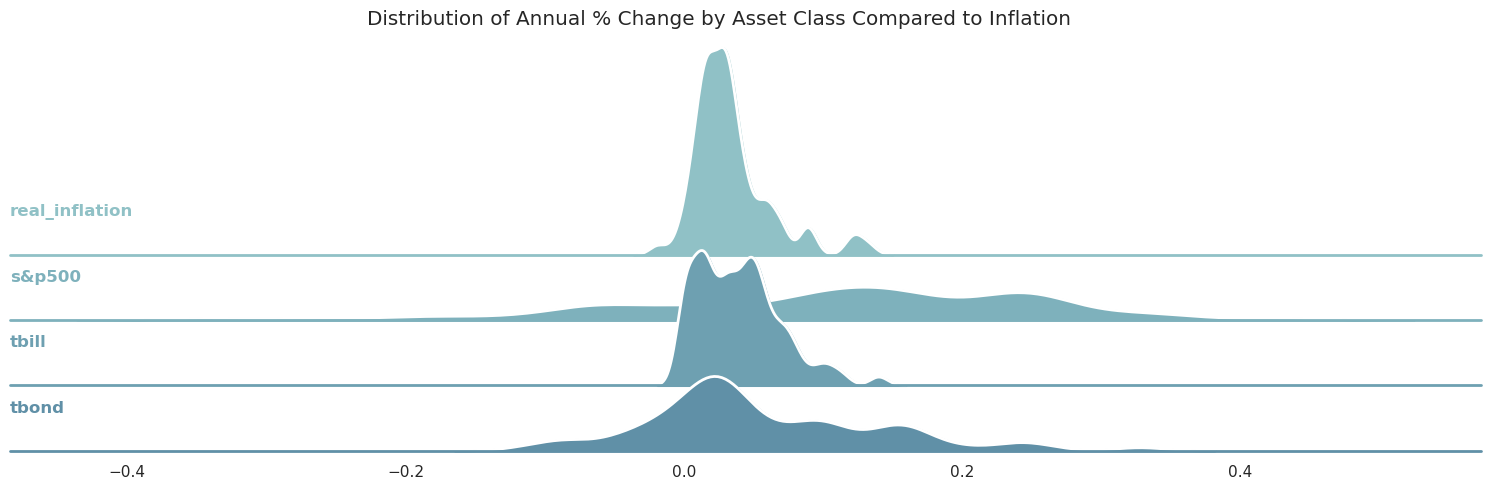

In [53]:
# Plot Credit: https://seaborn.pydata.org/examples/kde_ridgeplot.html

# Format long data
df_long = df.melt(var_name='asset', value_name='yoy_change')

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df_long, row="asset", hue="asset", aspect=12, height=1.3, palette=pal)

#Draw the densities in a few steps
g.map(sns.kdeplot, "yoy_change",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "yoy_change", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
      ax = plt.gca()
      ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "yoy_change")
g.set(xlabel="")
g.fig.suptitle('Distribution of Annual % Change by Asset Class Compared to Inflation')

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.7)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True);

**Answer to research question:** The plot above highlights how over the long term these three asset classes and inflation tend towards positive annual % change. You can get a sense of volatility based on the spreads of the distributions. Another way to think about is that a tighter spread indicates a safer asset. 3-month T Bills have a tight spread much like Inflation, which indicates it's a safer asset than the S&P500 or 10-year T Bonds. However, the tradeoff is smaller returns. S&P500 and T Bonds both have the potential for much higher positive annual % change.

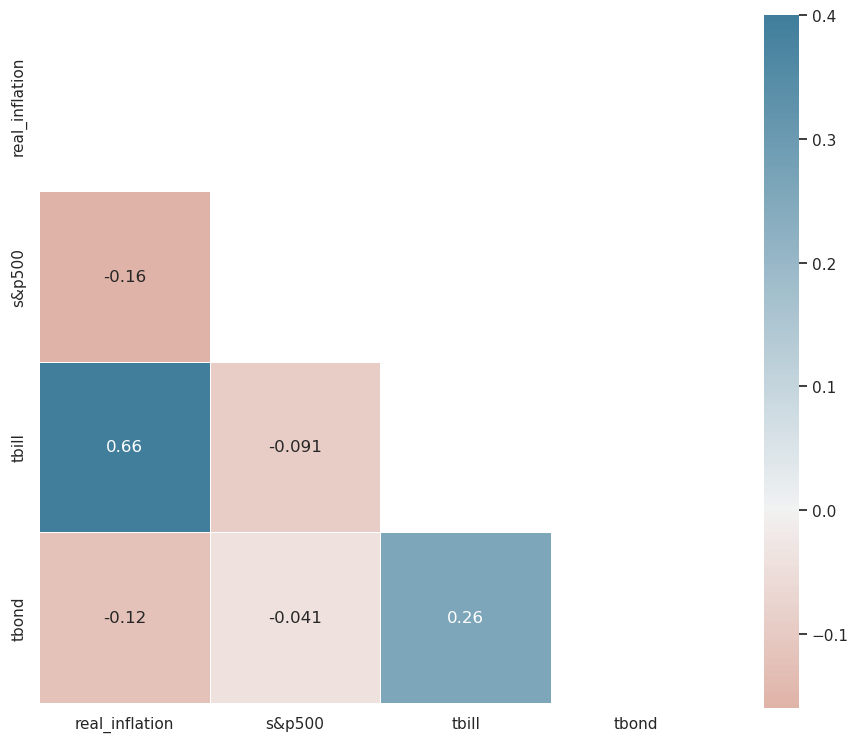

In [54]:
#plot credit: https://seaborn.pydata.org/examples/spreadsheet_heatmap.html

r = df.corr()
sns.set_theme(style="white")
mask = np.triu(np.ones_like(r, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(20, 230, as_cmap=True)
sns.heatmap(r, annot=True, mask=mask, cmap=cmap, vmax=.4, center=0,
            square=True, linewidths=.5, ax=ax);